https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDS0105ENSkillsNetwork20083975-2022-01-01

# 1. Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split # eğitim ve test ayrımı
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler # normalizasyon için
from sklearn.impute import SimpleImputer # eksik veriler için
from sklearn.preprocessing import LabelEncoder # kategorik veriler için
from sklearn.preprocessing import OneHotEncoder # kategorik verilerin vektör olarak temsili
import missingno as msno # null olan değerlerin grafiği için
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve, precision_score, recall_score, f1_score, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from yellowbrick.classifier import ConfusionMatrix
from pandas_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV


# Prediction için kullanılacak modüller
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


# 2. Loading the data into the data frame.


In [2]:
df = pd.read_csv("cars-last.csv")
df = df.iloc[:, 1:]
df.head()

,İlan No,İlan Tarihi,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,TL
0,20862633,27 Ağustos 2022,Fiat,Egea,1.4 Fire Street,2021,27.000 km,Düz,Benzin,Hatchback/5,1368 cc,95 hp,Önden Çekiş,"6,6 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden,362.000
1,20862380,27 Ağustos 2022,Renault,Clio,1.0 TCe Touch,2021,21.000 km,Otomatik,Benzin,Hatchback/5,999 cc,100 hp,Önden Çekiş,5 lt,42 lt,Belirtilmemiş,Takasa Uygun,Galeriden,489.500
2,20862220,27 Ağustos 2022,Renault,Fluence,1.5 dCi Icon,2015,121.000 km,Yarı Otomatik,Dizel,Sedan,1461 cc,110 hp,Önden Çekiş,"4,4 lt",60 lt,Tamamı orjinal,Takasa Uygun,Galeriden,422.000
3,20861832,27 Ağustos 2022,Skoda,SuperB,1.6 TDI Active,2017,154.000 km,Yarı Otomatik,Dizel,Hatchback/5,1598 cc,120 hp,Önden Çekiş,"4,1 lt",66 lt,Tamamı orjinal,Takasa Uygun Değil,Sahibinden,650.000
4,20861631,27 Ağustos 2022,Honda,Accord,2.0 Executive,2011,132.500 km,Otomatik,Benzin,Sedan,1998 cc,156 hp,Önden Çekiş,"7,3 lt",65 lt,4 boyalı,Takasa Uygun Değil,Sahibinden,445.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   İlan No              2002 non-null   int64 
 1   İlan Tarihi          2002 non-null   object
 2   Marka                2002 non-null   object
 3   Seri                 2002 non-null   object
 4   Model                2002 non-null   object
 5   Yıl                  2002 non-null   int64 
 6   Kilometre            2002 non-null   object
 7   Vites Tipi           2002 non-null   object
 8   Yakıt Tipi           2002 non-null   object
 9   Kasa Tipi            2002 non-null   object
 10  Motor Hacmi          2002 non-null   object
 11  Motor Gücü           2002 non-null   object
 12  Çekiş                2002 non-null   object
 13  Ort. Yakıt Tüketimi  2002 non-null   object
 14  Yakıt Deposu         2002 non-null   object
 15  Boya-değişen         2002 non-null   object
 16  Takasa

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
İlan No,2002.0,2.069110e+07,552009.890824,7309093.0,20810311.25,20836959.5,20849568.75,20862917.0
Yıl,2002.0,2.012344e+03,6.589012,1974.0,2010.00,2014.0,2017.00,2022.0


In [5]:
df.describe(exclude=["float", "int"]).T

,count,unique,top,freq
İlan Tarihi,2002,6,23 Ağustos 2022,401
Marka,2002,37,Renault,370
Seri,2002,182,Clio,123
Model,2002,814,1.5 dCi Touch,54
Kilometre,2002,796,130.000 km,21
Vites Tipi,2002,5,Düz,1041
Yakıt Tipi,2002,6,Dizel,1083
Kasa Tipi,2002,10,Sedan,1059
Motor Hacmi,2002,121,1598 cc,366
Motor Gücü,2002,124,90 hp,243


# 3. Checking the types of data

In [6]:
df.dtypes

İlan No                 int64
İlan Tarihi            object
Marka                  object
Seri                   object
Model                  object
Yıl                     int64
Kilometre              object
Vites Tipi             object
Yakıt Tipi             object
Kasa Tipi              object
Motor Hacmi            object
Motor Gücü             object
Çekiş                  object
Ort. Yakıt Tüketimi    object
Yakıt Deposu           object
Boya-değişen           object
Takasa Uygun           object
Kimden                 object
TL                     object
dtype: object

In [7]:
df["TL"] = df["TL"].apply(lambda x: x.replace(".", ""))
df["TL"] = df["TL"].apply(lambda x: x.replace(",", ""))

df["TL"] = df["TL"].apply(pd.to_numeric, errors="coerce")
print(df["TL"])


0       362000
1       489500
2       422000
3       650000
4       445000
         ...  
1997    490000
1998    499000
1999    250000
2000    258000
2001    480000
Name: TL, Length: 2002, dtype: int64


In [8]:
df["Kilometre"] = df["Kilometre"].apply(lambda x: x.replace(".", ""))

df["Kilometre"] = df["Kilometre"].apply(lambda x: x.strip("km"))
df["Kilometre"] = df["Kilometre"].astype(int)


In [9]:
df = df[df["Motor Hacmi"].isin(["Sedan"]) == False]


df["Motor Hacmi"] = df["Motor Hacmi"].apply(lambda x: x.strip("cc"))
df["Motor Hacmi"] = df["Motor Hacmi"].astype(int)


In [10]:
df["Ort. Yakıt Tüketimi"] = df["Ort. Yakıt Tüketimi"].apply(lambda x: x.replace(",", "."))

df["Ort. Yakıt Tüketimi"] = df["Ort. Yakıt Tüketimi"].apply(lambda x: x.strip("lt"))
df["Ort. Yakıt Tüketimi"] = df["Ort. Yakıt Tüketimi"].astype(float)


In [11]:
df["Yakıt Deposu"] = df["Yakıt Deposu"].apply(lambda x: x.replace(",", "."))

df["Yakıt Deposu"] = df["Yakıt Deposu"].apply(lambda x: x.strip("lt"))
df["Yakıt Deposu"] = df["Yakıt Deposu"].astype(float)


In [12]:
df = df[~df['Motor Gücü'].str.contains("-")]
df = df[~df['Motor Gücü'].str.contains("ve")]

df["Motor Gücü"] = df["Motor Gücü"].apply(lambda x: x.strip("hp"))
df["Motor Gücü"] = df["Motor Gücü"].astype(int)


# 4. Dropping irrelevant columns


In [13]:
df = df.drop(["İlan No", "İlan Tarihi"], axis=1)

# 5. Renaming the columns

df = df.rename(columns ={"col1": "newcol1"}, "col2":"newcol2")

In [14]:
df.head()

,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,TL
0,Fiat,Egea,1.4 Fire Street,2021,27000,Düz,Benzin,Hatchback/5,1368,95,Önden Çekiş,6.6,50.0,Tamamı orjinal,Takasa Uygun,Galeriden,362000
1,Renault,Clio,1.0 TCe Touch,2021,21000,Otomatik,Benzin,Hatchback/5,999,100,Önden Çekiş,5.0,42.0,Belirtilmemiş,Takasa Uygun,Galeriden,489500
2,Renault,Fluence,1.5 dCi Icon,2015,121000,Yarı Otomatik,Dizel,Sedan,1461,110,Önden Çekiş,4.4,60.0,Tamamı orjinal,Takasa Uygun,Galeriden,422000
3,Skoda,SuperB,1.6 TDI Active,2017,154000,Yarı Otomatik,Dizel,Hatchback/5,1598,120,Önden Çekiş,4.1,66.0,Tamamı orjinal,Takasa Uygun Değil,Sahibinden,650000
4,Honda,Accord,2.0 Executive,2011,132500,Otomatik,Benzin,Sedan,1998,156,Önden Çekiş,7.3,65.0,4 boyalı,Takasa Uygun Değil,Sahibinden,445000


# 6. Dropping the duplicate rows

In [15]:
df.shape

(1995, 17)

In [16]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate:", duplicate_rows_df.shape)

Number of duplicate: (1, 17)


In [17]:
df.count()

Marka                  1995
Seri                   1995
Model                  1995
Yıl                    1995
Kilometre              1995
Vites Tipi             1995
Yakıt Tipi             1995
Kasa Tipi              1995
Motor Hacmi            1995
Motor Gücü             1995
Çekiş                  1995
Ort. Yakıt Tüketimi    1995
Yakıt Deposu           1995
Boya-değişen           1995
Takasa Uygun           1995
Kimden                 1995
TL                     1995
dtype: int64

In [18]:
df = df.drop_duplicates()

# 7. Dropping the missing or null values.


In [19]:
df.isnull().sum()

Marka                  0
Seri                   0
Model                  0
Yıl                    0
Kilometre              0
Vites Tipi             0
Yakıt Tipi             0
Kasa Tipi              0
Motor Hacmi            0
Motor Gücü             0
Çekiş                  0
Ort. Yakıt Tüketimi    0
Yakıt Deposu           0
Boya-değişen           0
Takasa Uygun           0
Kimden                 0
TL                     0
dtype: int64

In [20]:
df = df.dropna()

# 8. Detecting Outliers


<AxesSubplot:xlabel='TL'>

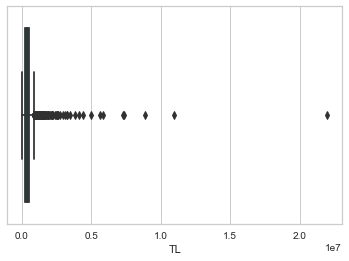

In [21]:
# sns.boxplot(x = "TL", data = df)
sns.boxplot(x=df['TL'])


<AxesSubplot:xlabel='Motor Hacmi'>

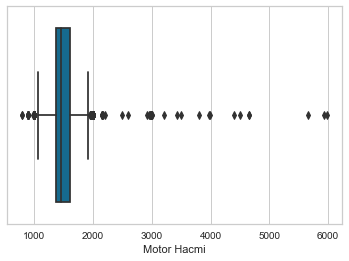

In [22]:
sns.boxplot(x = df["Motor Hacmi"])

<AxesSubplot:xlabel='Kilometre'>

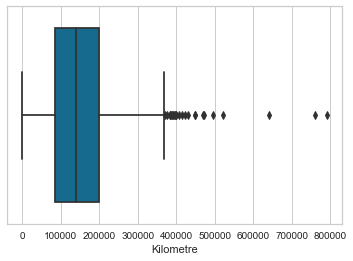

In [23]:
sns.boxplot(x = df["Kilometre"])

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Yıl                         7.00
Kilometre              113992.75
Motor Hacmi               230.00
Motor Gücü                 31.00
Ort. Yakıt Tüketimi         1.90
Yakıt Deposu               11.00
TL                     250075.00
dtype: float64


In [25]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1584, 17)

In [26]:
df.head()

,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Motor Hacmi,Motor Gücü,Çekiş,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,TL
0,Fiat,Egea,1.4 Fire Street,2021,27000,Düz,Benzin,Hatchback/5,1368,95,Önden Çekiş,6.6,50.0,Tamamı orjinal,Takasa Uygun,Galeriden,362000
2,Renault,Fluence,1.5 dCi Icon,2015,121000,Yarı Otomatik,Dizel,Sedan,1461,110,Önden Çekiş,4.4,60.0,Tamamı orjinal,Takasa Uygun,Galeriden,422000
3,Skoda,SuperB,1.6 TDI Active,2017,154000,Yarı Otomatik,Dizel,Hatchback/5,1598,120,Önden Çekiş,4.1,66.0,Tamamı orjinal,Takasa Uygun Değil,Sahibinden,650000
6,Ford,Focus,1.5 TDCi Trend X,2017,144500,Yarı Otomatik,Dizel,Station wagon,1499,120,Önden Çekiş,4.2,53.0,Belirtilmemiş,Takasa Uygun Değil,Galeriden,470000
8,Skoda,Octavia,1.6 TDI Optimal,2018,120000,Yarı Otomatik,Dizel,Hatchback/5,1598,115,Önden Çekiş,3.9,50.0,Belirtilmemiş,Takasa Uygun,Galeriden,539000


# 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram
Histogram, bir aralıktaki değişkenlerin ortaya çıkma sıklığını ifade eder

Text(0, 0.5, 'Araba Sayısı')

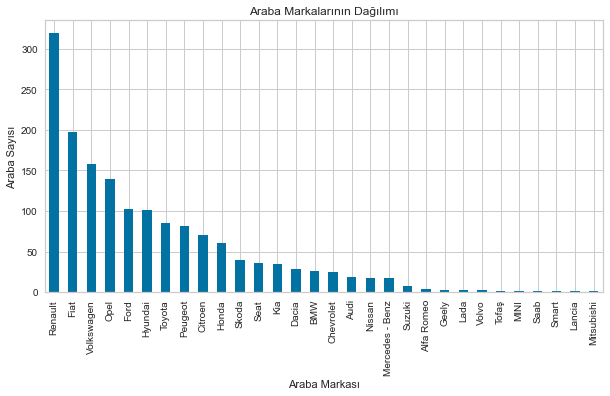

In [27]:
df["Marka"].value_counts().nlargest(40).plot(kind = "bar", figsize=(10,5))
plt.title("Araba Markalarının Dağılımı")
plt.xlabel("Araba Markası")
plt.ylabel("Araba Sayısı")

### Heat Maps

<AxesSubplot:>

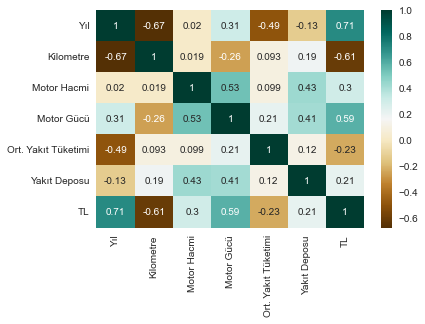

In [28]:
correlation = df.corr()
sns.heatmap(correlation, cmap="BrBG", annot=True)

### Scatterplot
İki değişken arasındaki korelasyonu bulmak için genellikle dağılım grafiklerini kullanırız.

Text(0, 0.5, 'Araba Fiyatı')

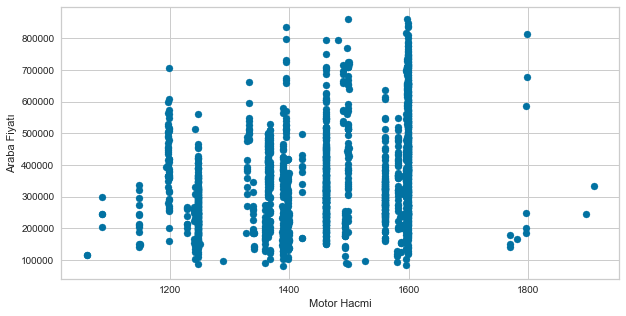

In [29]:
fig, axis = plt.subplots(figsize=(10, 5))
axis.scatter(x = df["Motor Hacmi"], y = df["TL"])
axis.set_xlabel("Motor Hacmi")
axis.set_ylabel("Araba Fiyatı")

# Label Encoding

In [30]:
le = LabelEncoder()

df["Marka"] = le.fit_transform(df["Marka"])
dict_Marka = dict(zip(le.classes_, le.transform(le.classes_)))

df["Seri"] = le.fit_transform(df["Seri"])
dict_Seri = dict(zip(le.classes_, le.transform(le.classes_)))

df["Model"] = le.fit_transform(df["Model"])
dict_Model = dict(zip(le.classes_, le.transform(le.classes_)))

df["Vites Tipi"] = le.fit_transform(df["Vites Tipi"])
dict_VitesTipi = dict(zip(le.classes_, le.transform(le.classes_)))

df["Yakıt Tipi"] = le.fit_transform(df["Yakıt Tipi"])
dict_YakıtTipi = dict(zip(le.classes_, le.transform(le.classes_)))

df["Kasa Tipi"] = le.fit_transform(df["Kasa Tipi"])
dict_KasaTipi = dict(zip(le.classes_, le.transform(le.classes_)))

# df["Motor Gücü"] = le.fit_transform(df["Motor Gücü"])
# dict_MotorGucu	 = dict(zip(le.classes_, le.transform(le.classes_)))

df["Çekiş"] = le.fit_transform(df["Çekiş"])
dict_Cekis = dict(zip(le.classes_, le.transform(le.classes_)))

df["Boya-değişen"] = le.fit_transform(df["Boya-değişen"])
dict_BoyaDegisen = dict(zip(le.classes_, le.transform(le.classes_)))

df["Takasa Uygun"] = le.fit_transform(df["Takasa Uygun"])
dict_TakasaUygun = dict(zip(le.classes_, le.transform(le.classes_)))

df["Kimden"] = le.fit_transform(df["Kimden"])
dict_Kimden= dict(zip(le.classes_, le.transform(le.classes_)))



In [31]:
print("Markalar\n", dict_Marka)
print("Serileri\n", dict_Seri)
print("Modelleri\n", dict_Model)
print("Vites Tipleri\n", dict_VitesTipi)
print("Yakıt Tipleri\n", dict_YakıtTipi)
print("Kasa Tipleri\n", dict_KasaTipi)
# print("Motor Güçleri\n", dict_MotorGücü)
print("Boya Değişme Durumu\n", dict_BoyaDegisen)
print("Takasa Uygunluk\n", dict_TakasaUygun)
print("Kimden Olduğu\n", dict_Kimden)

Markalar
 {'Alfa Romeo': 0, 'Audi': 1, 'BMW': 2, 'Chevrolet': 3, 'Citroen': 4, 'Dacia': 5, 'Fiat': 6, 'Ford': 7, 'Geely': 8, 'Honda': 9, 'Hyundai': 10, 'Kia': 11, 'Lada': 12, 'Lancia': 13, 'MINI': 14, 'Mercedes - Benz': 15, 'Mitsubishi': 16, 'Nissan': 17, 'Opel': 18, 'Peugeot': 19, 'Renault': 20, 'Saab': 21, 'Seat': 22, 'Skoda': 23, 'Smart': 24, 'Suzuki': 25, 'Tofaş': 26, 'Toyota': 27, 'Volkswagen': 28, 'Volvo': 29}
Serileri
 {'1 Serisi': 0, '106': 1, '156': 2, '206': 3, '207': 4, '208': 5, '3 Serisi': 6, '301': 7, '306': 8, '307': 9, '308': 10, '407': 11, '500 Ailesi': 12, '508': 13, '9-3': 14, 'A': 15, 'A1': 16, 'A3': 17, 'A4': 18, 'Accent': 19, 'Accent Blue': 20, 'Accent Era': 21, 'Albea': 22, 'Almera': 23, 'Altea': 24, 'Alto': 25, 'Astra': 26, 'Auris': 27, 'Avensis': 28, 'Aveo': 29, 'B': 30, 'B-Max': 31, 'Bora': 32, 'Brava': 33, 'Bravo': 34, 'C': 35, 'C-Elysee': 36, 'C-Max': 37, 'C3': 38, 'C4': 39, 'C4 Grand Picasso': 40, 'C4 Picasso': 41, 'C5': 42, 'CLA': 43, 'Ceed': 44, 'Cerato':

# Bağımlı Bağımsız Değişkenlerin Ayrılması

In [32]:
X = df.iloc[:, :-1].values # bağımsız değişkenler
y = df.iloc[:, -1:].values # bağımlı değişkenler

# Verilerin Eğitim ve Test için Bölünmesi


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [34]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1061, 16)
X_test shape: (523, 16)
y_train shape: (1061, 1)
y_test shape: (523, 1)


# Model Selection

In [35]:
models = []
models.append(['Logistic Regression', LogisticRegression()])
models.append(['Linear Regression', LinearRegression()])
models.append(['SVM', SVR()])
models.append(['KNeigbors', KNeighborsRegressor()])
models.append(['DecisionTree', DecisionTreeRegressor()])
models.append(['AdaBoostRegressor', AdaBoostRegressor()])
models.append(['GradientBoostingRegressor', GradientBoostingRegressor()])
models.append(['XGBRegressor', XGBRegressor()])
models.append(['LGBMRegressor', LGBMRegressor()])
models.append(['CatBoostRegressor', CatBoostRegressor()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['MLPRegressor', MLPRegressor()])
models.append(['RandomForest', RandomForestRegressor()])
models.append(['Ridge', Ridge()])
models.append(['Lasso', Lasso()])



In [36]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    SCORE = r2_score(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)

    print('Model Name:', models[m][0])
    print('Mean Squared Error:\n', MSE)
    print('Mean Absolute Error: ', MAE)
    print('R2 Score: ', SCORE)
    print('Root Mean Squared Error: ', RMSE)
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean() * 100))
    print('Standard Deviation: {:.2f} %'.format(accuracies.std() * 100))
    print('*' * 40)

    lst_2.append(models[m][0])
    lst_2.append(MSE)
    lst_2.append(MAE)
    lst_2.append(SCORE)
    lst_2.append(RMSE)
    lst_2.append(accuracies.mean() * 100)
    lst_2.append(accuracies.std() * 100)
    lst_1.append(lst_2)


Model Name: Logistic Regression
Mean Squared Error:
 17737238690.680687
Mean Absolute Error:  97349.97323135755
R2 Score:  0.28561222991849033
Root Mean Squared Error:  133181.22499316745
K-Fold Validation Mean Accuracy: 1.51 %
Standard Deviation: 0.87 %
****************************************
Model Name: Linear Regression
Mean Squared Error:
 5127024867.837885
Mean Absolute Error:  53554.509289680056
R2 Score:  0.7935031530916048
Root Mean Squared Error:  71603.24621019556
K-Fold Validation Mean Accuracy: 77.54 %
Standard Deviation: 3.89 %
****************************************
Model Name: SVM
Mean Squared Error:
 26283209988.176132
Mean Absolute Error:  123951.28404500027
R2 Score:  -0.05858663242224438
Root Mean Squared Error:  162120.97331368367
K-Fold Validation Mean Accuracy: -4.57 %
Standard Deviation: 4.26 %
****************************************
Model Name: KNeigbors
Mean Squared Error:
 17839600018.490784
Mean Absolute Error:  103839.7502868069
R2 Score:  0.2814895092407

In [37]:
df_col = pd.DataFrame(lst_1, columns=['Model Name', 'Mean Squared Error', 'Mean Absolute Error', 'R2 Score', 'Root Mean Squared Error',
                      'K-Fold Validation Mean Accuracy', 'Std.Deviation'])

df_col.sort_values(by=["R2 Score", "K-Fold Validation Mean Accuracy"],
                   ascending=False, inplace=True)
df_col


,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score,Root Mean Squared Error,K-Fold Validation Mean Accuracy,Std.Deviation
9,CatBoostRegressor,1.874481e+09,31603.479990,0.924503,43295.272353,-19843.585417,679.836862
8,LGBMRegressor,2.069658e+09,32631.968474,0.916642,45493.494569,89.623828,1.886050
7,XGBRegressor,2.257206e+09,34888.181779,0.909088,47510.064242,87.902339,2.158736
13,RandomForest,2.313583e+09,35443.407540,0.906818,48099.716759,87.616130,2.522403
6,GradientBoostingRegressor,2.329148e+09,35664.151917,0.906191,48261.242824,88.979055,1.829822
5,AdaBoostRegressor,4.486851e+09,54063.003089,0.819287,66983.962058,79.869821,4.581581
4,DecisionTree,5.026870e+09,50428.554493,0.797537,70900.420844,75.598441,7.269323
14,Ridge,5.104616e+09,53557.448504,0.794406,71446.594343,77.539238,3.900784
15,Lasso,5.126799e+09,53554.297697,0.793512,71601.671732,77.536206,3.891295
1,Linear Regression,5.127025e+09,53554.509290,0.793503,71603.246210,77.536170,3.891381


Text(0.5, 1.0, 'Models Compare')

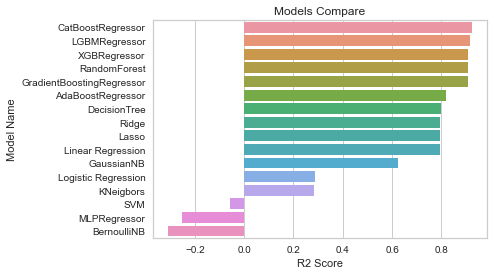

In [38]:
sns.barplot(x = "R2 Score", y= "Model Name", data=df_col)
plt.title("Models Compare")

# Model Tuning

In [39]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [40]:
# grid_models = [

    # (CatBoostRegressor(), [
    #  {
    #      'depth': [6, 8, 10],
    #      'learning_rate': [0.01, 0.05, 0.1],
    #      'iterations': [30, 50, 100]
    #  }
    #  ]),
# ]

# for model, params in grid_models:
#     grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv=10, n_jobs=-1)
#     grid.fit(X_train, y_train)
#     best_accuracy = grid.best_score_
#     best_param = grid.best_params_
#     print(f"{model}\n Best Accuracy: {best_accuracy * 100}")
#     print(f"Best Params: {best_param}")
#     print("*" * 40)



In [41]:
# classifier = CatBoostRegressor(depth= 6, iterations= 30, learning_rate= 0.01)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

In [42]:
# MSE = mean_squared_error(y_test, y_pred)
# MAE = mean_absolute_error(y_test, y_pred)
# SCORE = r2_score(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
# print('Mean Squared Error:\n', MSE)
# print('Mean Absolute Error: ', MAE)
# print('R2 Score: ', SCORE)
# print('Root Mean Squared Error: ', RMSE)
# print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean() * 100))
# print('Standard Deviation: {:.2f} %'.format(accuracies.std() * 100))
# print('*' * 40)


In [43]:
params = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4]
}


In [44]:
model = XGBRegressor()
grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print(f"{model}\n Best Accuracy: {best_accuracy * 100}")
print(f"Best Params: {best_param}")
print("*" * 40)

# 8m 16.1s => 4000 paramaters

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
 Best Accuracy: nan
Best Params: {'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}
****************************************


In [45]:
xgb = XGBRegressor(booster= 'gbtree', learning_rate= 0.05, max_depth= 2, min_child_weight= 1)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
SCORE = r2_score(y_test, y_pred)
RMSE = np.sqrt(MSE)

accuracies = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)
print('Mean Squared Error:', MSE)
print('Mean Absolute Error: ', MAE)
print('R2 Score: ', SCORE)
print('Root Mean Squared Error: ', RMSE)
print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std() * 100))
print('*' * 40)


Mean Squared Error:
 5126799394.76444
Mean Absolute Error:  53554.297696619986
R2 Score:  0.7935122342799996
Root Mean Squared Error:  71601.67173163235
K-Fold Validation Mean Accuracy: 84.89 %
Standard Deviation: 1.85 %
****************************************
